# 실습1

In [24]:
def printn(s,e):
    for n in range(s,e+1):
        for ss in range(n,n+(e-s+1)):
            print(ss,end=" ")
        print()
if __name__=="__main__":
    s,e=map(int,input("enter start and end number>>").split())
    printn(s,e)

enter start and end number>>11 13
11 12 13 
12 13 14 
13 14 15 


# 실습2

In [27]:
def star_f(n):
    for i in range(n,0,-1):
        print('\u2605'*i)
    for i in range(1,n+1):
        print('\u2605'*i)
if __name__=="__main__":
    n=int(input("enter a number>>"))
    star_f(n)

enter a number>>3
★★★
★★
★
★
★★
★★★


# 실습2-1
피라미드

In [89]:
def star_f2(n):
    for i in range(1,n*2,2):
        if i<=n:
            print((' '*()+('\u2605'*i))
        else:
            print('\u2605'*i)
#     for i in range(1+n+1):
#         print((' '*(n-i))+('\u2605'*((2*i)-n)))
if __name__=="__main__":
    n=int(input("enter a number>>"))
    star_f2(n)

enter a number>>3
      ★
  ★★★
★★★★★


# 실습2-2

In [62]:
def alpapyramid(n):
    a=65
    for j in range(n):
        for i in range(n,j,-1):
            print(chr(a),end=" ")
            a+=1
        a=65
        print()
if __name__=="__main__":
    n=int(input("enter a number>>"))
    alpapyramid(n)

enter a number>>3
A B C 
A B 
A 


#### (참고)

In [69]:
a=65
for i in range(n,0,-1):
    for j in range(i):
        print(chr(a+j),end=" ")
    print()

A B C 
A B 
A 


# 실습2-3

In [83]:
def alpapyramid2(n):
    a=65
    for i in range(1,n+1):
        for j in range(i):
            print(chr(a+j),end=" ")
        print()

if __name__=="__main__":
    n=int(input("enter a number>>"))
    alpapyramid2(n)

enter a number>>7
A 
A B 
A B C 
A B C D 
A B C D E 
A B C D E F 
A B C D E F G 


# 이산확률 관련 함수 : lea 모듈

In [16]:
from lea import leaf
import lea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

- 주사위 한 번 던지고, 출력은 분수로

In [104]:
leaf.dice(1,prob_type='r')

1 : 1/6
2 : 1/6
3 : 1/6
4 : 1/6
5 : 1/6
6 : 1/6

In [111]:
dice= leaf.dice(1,prob_type='r')
print(dice)

X=dice.support
p_x=dice.ps
x_sum=dice.p_sum
print(f'확률변수:{X}, 각 확률:{p_x},모든 확률 합:{x_sum}')

1 : 1/6
2 : 1/6
3 : 1/6
4 : 1/6
5 : 1/6
6 : 1/6
확률변수:(1, 2, 3, 4, 5, 6), 각 확률:(1/6, 1/6, 1/6, 1/6, 1/6, 1/6),모든 확률 합:1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   f(dice)  6 non-null      object
dtypes: object(1)
memory usage: 96.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, f(dice) to f(dice)
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       1 non-null      object
 1   2       1 non-null      object
 2   3       1 non-null      object
 3   4       1 non-null      object
 4   5       1 non-null      object
 5   6       1 non-null      object
dtypes: object(6)
memory usage: 136.0+ bytes
None
           1    2    3    4    5    6
f(dice)  1/6  1/6  1/6  1/6  1/6  1/6

x:(5,),p:1/6


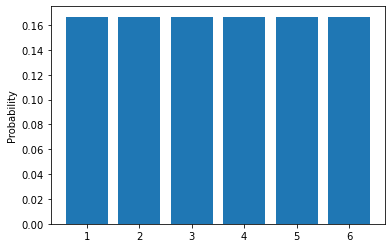

In [121]:
pt=pd.DataFrame(dice.ps,index=dice.support,columns=['f(dice)'])
print(pt.info())
print()

pt_t=pt.T
print(pt_t.info())
print(pt_t)
print()

x=dice.random_draw(1)
p=dice.p(x[0])
print(f'x:{x},p:{p}')
dice.plot()
plt.show()

## 이산분표를 생성하는 함수 : vals(), pmf()

A : 1/6
B : 2/6
C : 3/6 
 1


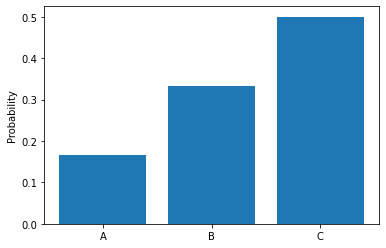

In [125]:
symbol =lea.vals('A','B','B','C','C','C',prob_type='r')
print(symbol,'\n',symbol.p_sum)
symbol.plot()

A : 0.16666666666666666
B : 0.3333333333333333
C : 0.5 
 1.0


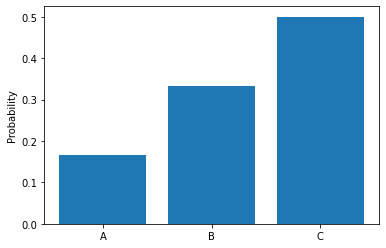

In [126]:
symbol2=lea.pmf({'A':1,'B':2,'C':3})
print(symbol2,'\n',symbol2.p_sum)
symbol2.plot()

- 동전의 앞,뒤를 처리하는 이산확률을 생성하고 확률 분포표를 작성

O : 0.5
X : 0.5 
 1.0


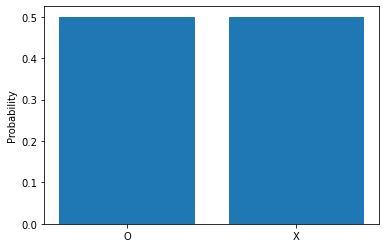

In [128]:
coin=lea.pmf({'O':1,'X':1})
print(coin,'\n',coin.p_sum)
coin.plot()

In [130]:
flip =lea.vals('H','T',prob_type='r')
p1=flip.p('T')#'flip변수에 저장되어 있는 T'가 나올 확률 
p2=lea.P(flip =='T')
print(p1,p1)

df=pd.DataFrame(flip.ps,index=flip.support,columns=['coin'])
print(df.T)

1/2 1/2
        H    T
coin  1/2  1/2


## 임의로 동전을 던질때의 확률
+ random 모듈의 seed 함수 이용
+ leadml random 함수 이용

- 동전 5번 던진후 랜덤하게 발생된 사건에 대한 확률

In [179]:
# random.seed(7777) #seed값을 고정,이 코드가 없으면 계속 달라짐
flip =lea.vals('H','T',prob_type='r')
print(flip)

temp=flip.random(5)#언패킹
print(temp)

flip2 =lea.vals(*temp, prob_type='r')

b=lea.P(flip2=='H')
print(b)

H : 1/2
T : 1/2
('H', 'T', 'T', 'H', 'H')
3/5


# 조건부 확률  
- 사상 A가 알려진 상황 -> 사상 B가 일어날 확률 P(B|A)      

- given(), interval()

- 주사위를 던져서 짝수가 나올 확률, 그중에 4가 나올 확률? P(4|짝)

In [182]:
dice = leaf.dice(1,prob_type='r')
b=lea.P((dice==2)|(dice==4)|(dice==6))# 2,4,6가 나올 확률
print(b)

c=lea.P(dice%2==0)#짝수가 나올 확률
print(c)

#조건부 확률
d=dice.given((dice%2==0)).p(4)
print(d)

1/2
1/2
1/3


In [186]:
dice1=lea.interval(1,6,prob_type='r')
dice1

1 : 1/6
2 : 1/6
3 : 1/6
4 : 1/6
5 : 1/6
6 : 1/6

In [190]:
dice1=lea.interval(1,6,prob_type='r')
dice2=dice1.new()
dice3=lea.joint(dice1,dice2)
df=pd.DataFrame(dice3.ps,index=dice3.support,columns=['dice joint'])
print(df)
print(df.T)

    dice joint
1 1       1/36
  2       1/36
  3       1/36
  4       1/36
  5       1/36
  6       1/36
2 1       1/36
  2       1/36
  3       1/36
  4       1/36
  5       1/36
  6       1/36
3 1       1/36
  2       1/36
  3       1/36
  4       1/36
  5       1/36
  6       1/36
4 1       1/36
  2       1/36
  3       1/36
  4       1/36
  5       1/36
  6       1/36
5 1       1/36
  2       1/36
  3       1/36
  4       1/36
  5       1/36
  6       1/36
6 1       1/36
  2       1/36
  3       1/36
  4       1/36
  5       1/36
  6       1/36
               1                                   2                    ...  \
               1     2     3     4     5     6     1     2     3     4  ...   
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  ...   

               5                       6                                
               3     4     5     6     1     2     3     4     5     6  
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1

In [189]:
#첫번째 주사위가 2보다 작은수가 나오는 조건부 확률
print(dice3.given(dice1<=2))

(1, 1) : 1/12
(1, 2) : 1/12
(1, 3) : 1/12
(1, 4) : 1/12
(1, 5) : 1/12
(1, 6) : 1/12
(2, 1) : 1/12
(2, 2) : 1/12
(2, 3) : 1/12
(2, 4) : 1/12
(2, 5) : 1/12
(2, 6) : 1/12


# 조건부 확률 예제

### 예제 1   
   - 두봉지의 별사탕을 하나의 접시에 담고, 별사탕하나를 꺼냈더니, 분홍색이
    나왔다. 이때 이 별사탕이 첫번째 봉지에서 나왔을 확률은?   
A = 하얀별사탕   
B = 분홍별사탕   
F = 첫번째 봉지   
S = 두번째 봉지
 
    P(F|B)?  
    P(F) \* P(B|F) / P(B)   
    1/2 \* 3/4 / (3/8+2/8) = 3/5 = 60%


###  예제 2  
   - 폐암 확률과 진단 시약과의 조건부 확률 계산    
   -C 지역과 J 지역에서 평생 1백명 가운데 1명이 폐암에 걸려 사망    
   -해당 지역 주민 한명이 폐암일 경우 진단 시약에서 99%의 양성반응을 보임     
   -진단 시약에서 양성반응이 나왔을 경우 폐암일 확률은?      
   L = 폐암, P(L) = 폐암확률 0.01   
   p = 양성반응   
   P(p|L) = 0.99   
   
   P(L|p) ?
   P(L|p) = P(L) \* P(p|L) / P(p)

    C와 J 지역의 모든 주민 대상으로 양성이 나올 확률    
    P(p) = P(p|Lc) \* P(Lc) + P(p|L) \* P(L)
        = 0.01 \* 0.99 + 0.99 \* 0.01 = 0.0198 = 약 2%    
    P(L|p) = 0.01 \* 0.99 / 0.02 = 0.495

###  예제3  
- 몬티홀(Monty Hall) 문제
    세 개 색상(빨강,노랑,파랑) 3개의 문이 있고, 이 중 하나만 상품이 있음
    사용자는 단 하나의 문만 선택할 수 있으며,하나의 문을 선택 시 사회자는 나머지 두 문 중 하나를 열어 보여 상품이 없음을 보여 줌(사회자는 상품이 들어있는 문을 알고 있음)
    이 후에 사회자는 사용자에게 문을 바꿀 수 있는 선택을 기회를 줌
    이 경우, 사용자는 선택한 문을 유지하는 것이 유리할지, 바꾸는 것이 유리할지 확률값을 이용하여 결정
    
    R : 빨강문
Y : 노랑문
B : 파랑문  
P(컬러) : 컬러문에 상품이 있을 확률  
P(R) = P(Y) = P(B) = 1/3  
진행자는 2개 중 하나의 선택이므로 1/2  

    사용자가 R 선택 후 사회자가 상품이 없는 Y의 문을 열어 보여줌   
R 유지 시 상품 당첨 확률? -> 1/3  
B로 변경 시 상품 당첨 확률?   
P(B|Y) = P(B) \* P(Y|B) / P(Y)= 1/3 * 1/0.5 = 2/3

# 베이즈 정리
- 의사결정과정, 사건들의 관계 분석을 위해 활용
- 사전적 확률 정보를 이용 -> 사후적 확률을 예측하는 이론
- 메카니즘  
    사전적 확률 P(B),P(A|B)-> (추가 정보 : 사건 A 가 발생) -> 사후적 확률 P(B|A) 

### 예제
- 두 개의 공장에서 노트북 생산 수원공장(30%), 아산공장(70%)  
    수원공장에서 발생하는 불량률은 0.02, 아산공장은 0.03  
    제품 중에서 불량품이 발견되었다면 아산공장에서 생산된 확률은?    
    
    P(A) : 수원공장의 생산 확률, 0.3  
    P(B) : 아산공장의 생산 확률, 0.7  
    P(Q) : 노트북 불량률  
    P(Q|A) : 0.02, P(Q|B ) : 0.03  
    P(B|Q) ?  
    
    P(B|Q) = P(B 교집합 Q) / P(Q)   
    = P(B) P(Q|B) / P(Q)    
    = 0.7 \* 0.03 / (0.02+0.03)   
    = 0.42

### 베이즈 정리 python 코드
- 바구니1에는 노랑사탕 30개, 빨강사탕 10개,   
    바구니2에는 노랑사탕과 빨강사탕 각 20개가 들어있음  
    1개를 선택 시 노랑사탕이 나왔을 때, 이 사탕이 바구니1에서 나왔을 확률?  
    
    전체 사탕에 대한 확률 생성,   
    전체 사탕은 80개로 노랑사탕은 50/80 -> 5/8

In [4]:
candy = lea.pmf({'Y':50, 'R':30}, prob_type='r')
candy.p('Y') 

5/8

basket_1 : 1/2
basket_2 : 1/2
R : 1/4
Y : 3/4
       basket_1 basket_2
yellow      1/4      1/2
red         3/4      1/2


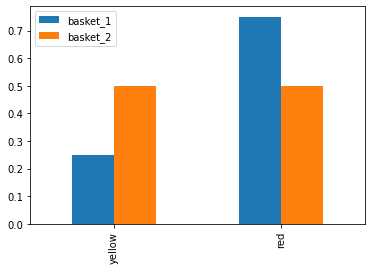

In [2]:
basket1 = lea.vals("basket_1","basket_2",prob_type='r')
print(basket1)
basket1.p('basket_1')
basket_1 = lea.pmf({'Y':30,'R':10},prob_type='r')
print(basket_1)
basket_2 = lea.pmf({'Y':20,'R':20},prob_type='r')

#확률분포 생성
data = {'basket_1':basket_1.ps, 'basket_2':basket_2.ps}
df = pd.DataFrame(data, index=['yellow','red'])
print(df)

#bar chart 로 표현할 때, 유리수는 처리못하므로 실수로 변경
df_ = df.astype('float')
df_.plot(kind='bar')

# 회귀분석
- 모형을 이용하여 관심 대상 변수의 값을 예측 또는 모형의 신뢰성을 추론하는 통계적 기법


- 종속변수(dependent variable), 반응변수(response variable), y    
    모형에서 다른 변수들의 영향을 받는다고 가정되는 변수
- 독립변수(independent variable), 예측변수(predictor variable), x    
    다른 변수에 영향을 미치거나, 실험자에 의해 통제되는 변수

- 자세한 내용은 파일 참고 

## 단순 회귀분석 예제1 - 지도학습
### -  자동차 연비 데이터셋을 이용한 단순회귀 분석

### 1. 데이터 불러오기

In [10]:
file_path = '../Downloads/auto-mpg.csv'
df = pd.read_csv(file_path, header=None)#columns이 없이 첫줄부터 데이터인경우
df.columns =['mpg','cylinders','displacement','horsepower','weight','acceleration',
'model year','origin','name']
pd.set_option('display.max_column', 9)#column 갯수 조정

### 2-1. 데이터 확인
- 'horsepower'가 수치형이 아닌 'object'인 점 확인

In [11]:
print(df.info())
print()
print(df.describe())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000  

### 2-2 데이터 고유 값 확인 : 이상치 발견
- '?'가 있음

In [12]:
print(df['horsepower'].unique())#열의 고유값 확인

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


### 3. 전처리

In [32]:
df['horsepower'].replace('?',np.nan,inplace=True)# 데이터 중 '?' 제거
df.dropna(subset=['horsepower'],axis=0, inplace=True)#none이 있는 행 전체 drop
df['horsepower'] = df['horsepower'].astype('float')#'float'로 형변환
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

### 4-1. 회귀 분석
#### 단순회귀분석에 독립변수 및 종속변수로 사용될 후보열 선택
- 종속변수는 자동차 연비인 mpg(mile/gallon)   
    -어떤 관계가 있는지 궁금한 (분석하고 싶은) 컬럼을 종속변수로 두기
- 독립변수는 cylinders, horsepower, weight 를 선택
- 다중공선성 유무 확인

### 4-2. 그래프 
#### 선택된 독립변수 중 mpg와 선형관계가 있는지 그래프로 확인   
- 단순회귀분석이므로 종속과 독립변수의 1:1 관계를 찾음      

#### 시각화 모듈 
- matplotlib.pyplot  
- Seabon    
    -sns.regplot    
    -sns.jointplot : 두 변수의 히스토그램이 x,y축에 별도로 표시되는 특징이 있음     
    -sns.pairplot : 두 변수간의 산점도를 그림. 단, 자기 자신과는 히스토다이어그램을 작성

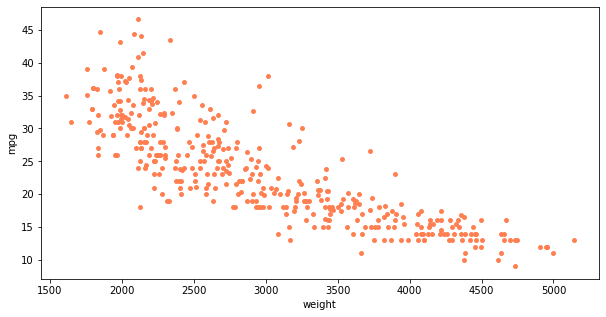

In [14]:
ndf = df[['mpg','cylinders','horsepower','weight']] #4개 컬럼만 추출
ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=15,figsize=(10,5))
plt.show()
plt.close()

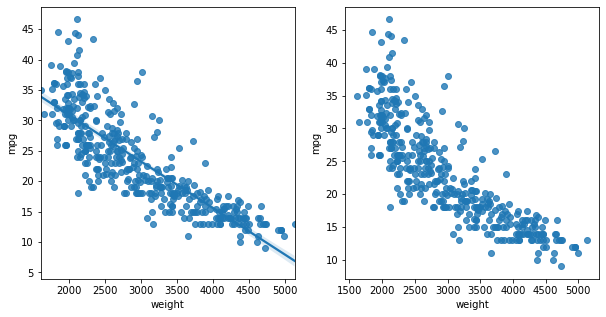

In [29]:
fig = plt.figure(figsize=(10,5))#전체 그래프 사이즈
ax1 = fig.add_subplot(1,2,1)# 사이즈 분할 (행,열,위치 번호)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax2,fit_reg=False) #회귀선 미표시
plt.show()
plt.close()

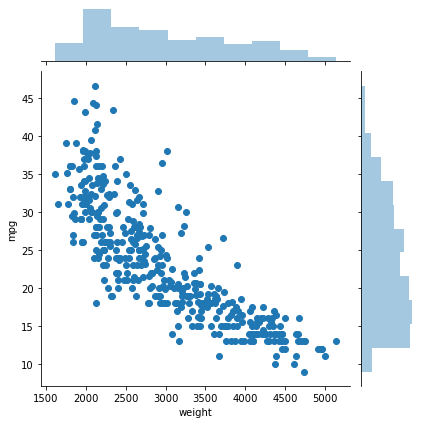

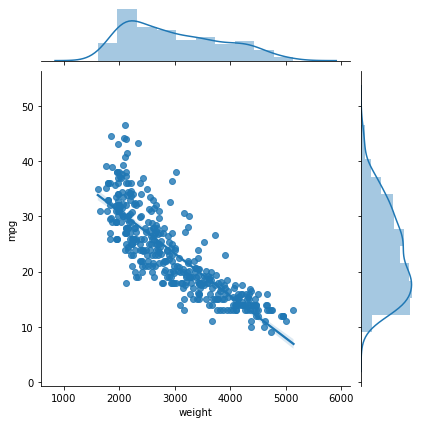

In [30]:
sns.jointplot(x='weight',y='mpg',data=ndf)
sns.jointplot(x='weight',y='mpg',data=ndf,kind='reg')
plt.show()
plt.close()

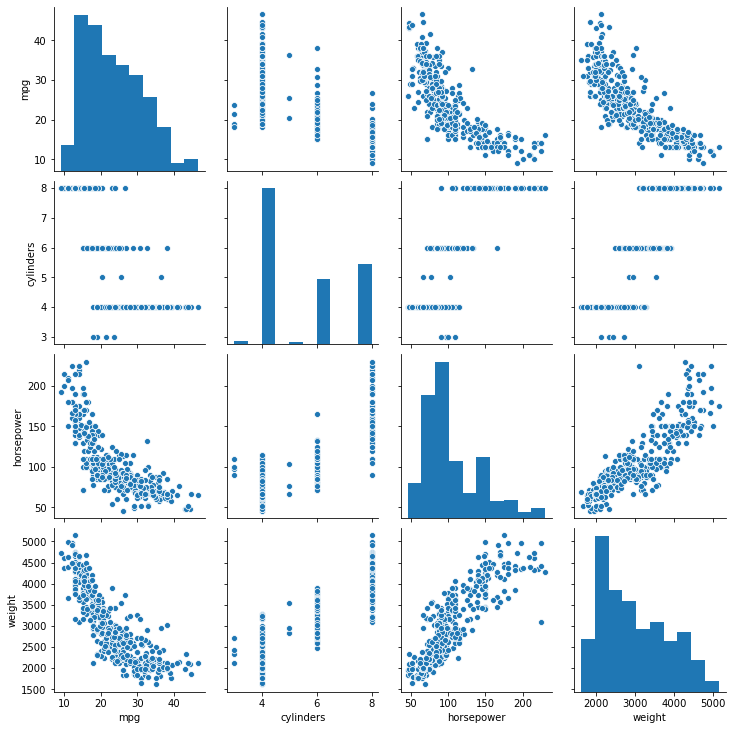

In [31]:
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

### 그래프 해석
- 산점도로 확인 결과 ‘horsepower’와 ‘weight’ 의 독립변수가 종속변수인 ‘mpg’와
선형관계를 보임을 알 수 있음


- 두 변수간의 회귀방정식을 구함

### 5-1. 기계 학습 : 데이터 분리
- 훈련데이터와 검증데이터로 나누어 모형을 구축
- 첫 번째 모형은 mpg 와 weight 를 사용, 훈련과 검증을 7:3 으로 나눔

# 기계 학습 
## sklearn 패키지
- 훈련과 검증데이터로 나눔  
    from sklearn.model_selection import train_test_split

In [37]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print(f'train data num: {len(X_train)}, test data num: {len(X_test)}')

train data num: 274, test data num: 118


### 5-2. 기계 학습 : LineareRegression() 모델 적용
- sklearen 의 LineareRegression 을 사용

In [38]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)#모형 학습
r_square = Lr.score(X_test,y_test)#test data를 적용하여 결정계수 계산

print(r_square)# 1에 가까울수록 좋음 : 예측값에 가까운 것 
print(f'기울기 a: {Lr.coef_}')
print(f'y절편 b: {Lr.intercept_}')

0.6822458558299325
기울기 a: [-0.00775343]
y절편 b: 46.710366257280086


### 6. 결과 비교
- 학습된 모형이 예측한 결과와 실제 값을 비교
- 독립 변수 전체 데이터를 predict 메소드에 입력 후 모형이 반환하는 예측값을 y_hat에
저장, 실제 y와 y_hat을 그림으로 그려서 비교

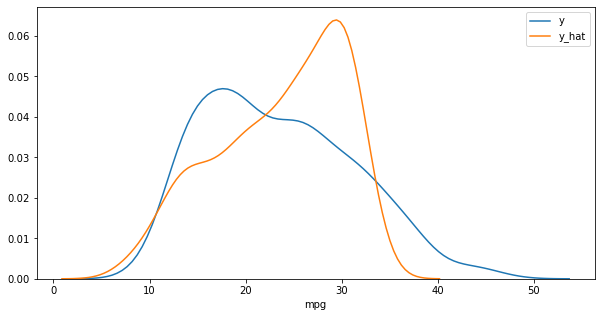

In [39]:
y_hat = Lr.predict(X)
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')#hist=False 는 히스토그램을 생성하지 않음
ax2 = sns.distplot(y_hat,hist=False,label='y_hat',ax=ax1)
plt.show()
plt.close()

#### 그래프 해석
- 그래프의 상태를 보면 실제값과 예측값 사이에 오차가 크게 발생
- 이런 경우는 선형보다 곡선의 비선형 회귀분석을 통한 모형이 적합할 수 있음을
    알 수 있음


## (참고) matplotlib에서 한글 폰트 사용법
- 자신의 개발환경에 설치된 포트를 확인 후

In [44]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

- 한글 폰트 설정 뒤, 축에 적용

In [ ]:
mpl.rc('font', family='NanumGothicOTF') # 자신의 OS에 존재하는 한글 폰트를 선택

#참고로 한글 폰트 사용 시 유니코드가 – 기호로 설정되는 폰트 깨짐 해결의 코드는
mpl.rcParams['axes.unicode_minus'] = False

## 단순 회귀분석 예제2 교재 p.140
### - 프로야구선수의 다음 해 연봉 예측

In [48]:
picher_file_path = '../Downloads/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [46]:
picher.head()

,선수명,팀명,승,패,...,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,...,3.44,6.62,140000,85000
1,소사,LG,11,11,...,3.41,6.08,120000,50000
2,양현종,KIA,20,6,...,3.82,5.64,230000,150000
3,차우찬,LG,10,7,...,4.03,4.63,100000,100000
4,레일리,롯데,13,7,...,4.31,4.38,111000,85000


In [52]:
picher.shape

(152, 22)

In [50]:
batter_file_path = '../Downloads/batter_stats_2017.csv'
batter = pd.read_csv(batter_file_path)
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [51]:
batter.head()

,선수명,팀명,경기,타석,...,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,...,0.442,7.30,120000,120000
1,최형우,KIA,142,629,...,0.430,7.20,150000,150000
2,박건우,두산,131,543,...,0.424,7.04,37000,19500
3,나성범,NC,125,561,...,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,...,0.398,5.60,150000,65000


In [53]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

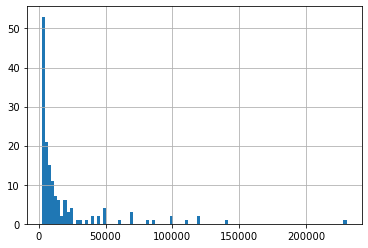

In [54]:
picher['연봉(2018)'].hist(bins=100)

In [ ]:
picher_features_df=picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]
# def plot_hist_each_column(df):
#     plt.rcParams